# Курс "Быстрый старт в искусственный интеллект". 
# Неделя 1. Машинное обучение. 
## 1.1. Фреймворк машинного обучения. Метод ближайших соседей.
В этом ноутбуке мы обучим и протестируем самую простую модель машинного обучения --- метод ближайших соседей. Мы будем решать с его помощью задачу распознавания классов в датасете "Игрушка дьявола".

Импортируем необходимые библиотеки. Numpy --- это библиотека для быстрой и удобной работы с массивами числовых данных. Matplotlib --- библиотека для построения графиков и визуализации.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Датасет

Создадим функцию, которая генерирует датасет "Игрушка дьявола" из N точек и K классов в D-мерном пространстве.

In [2]:
def devil(N, D=2, K=3):
    N = 100
    D = 2
    K = 3
    X = np.zeros((N * K, D))
    y = np.zeros(N * K, dtype='uint8')

    for j in range(K):
        ix = range(N * j,N * (j + 1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    return X, y

In [3]:
X, y = devil(300)

Добавим в данные шум, чтобы усложнить задачу.

In [4]:
X[:, 0] += np.random.normal(loc=0, scale=0.15, size=300)
X[:, 1] += np.random.normal(loc=0, scale=0.15, size=300)

In [5]:
# Отрисовочная магия
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

x_min, x_max = (-1, 1)
y_min, y_max = (-1, 1)

h = 0.05

Вот как выглядит наш датасет. Три цвета обозначают три различных класса.

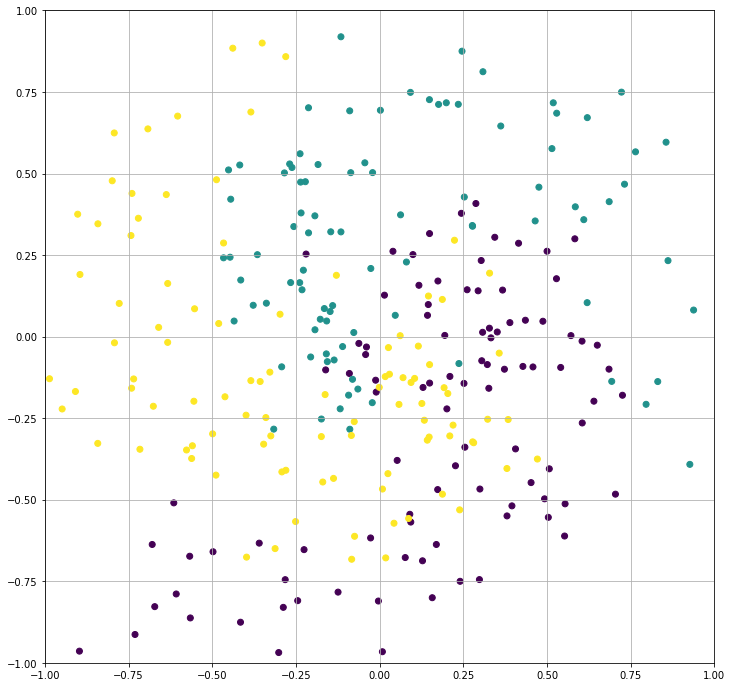

In [6]:
plt.figure(figsize=(12, 12))

plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))

plt.grid(True)

plt.show()

### Разбиение на train и test

Перед началом работы необходимо разбить датасет на обучающую и тестовую выборки.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.6)

### Моделирование
Импортируем и обучим модель K ближайших соседей

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

### Применение модели и измерение качества
Измерим качество работы модели на train и test.

In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [11]:
# Импортируем метрику качества из sklearn metrics. 
# Функция accuracy_score принимает на вход 
# истинные и предсказанные лейблы и возвращает 
# процент совпавших ответов
from sklearn.metrics import accuracy_score

print(f'Процент правильно угаданных ответов на обучающем множестве: {accuracy_score(y_train, y_train_pred)}')
print(f'Процент правильно угаданных ответов на тестовом множестве: {accuracy_score(y_test, y_test_pred)}')

Процент правильно угаданных ответов на обучающем множестве: 0.7944444444444444
Процент правильно угаданных ответов на тестовом множестве: 0.7666666666666667


Видим, что процент угаданных ответов на обучающем множестве больше, чем на тестовом. Это следствие переобучения модели. О реальном качестве работы свидетельствует именно качество на test.

### Визуализация результатов

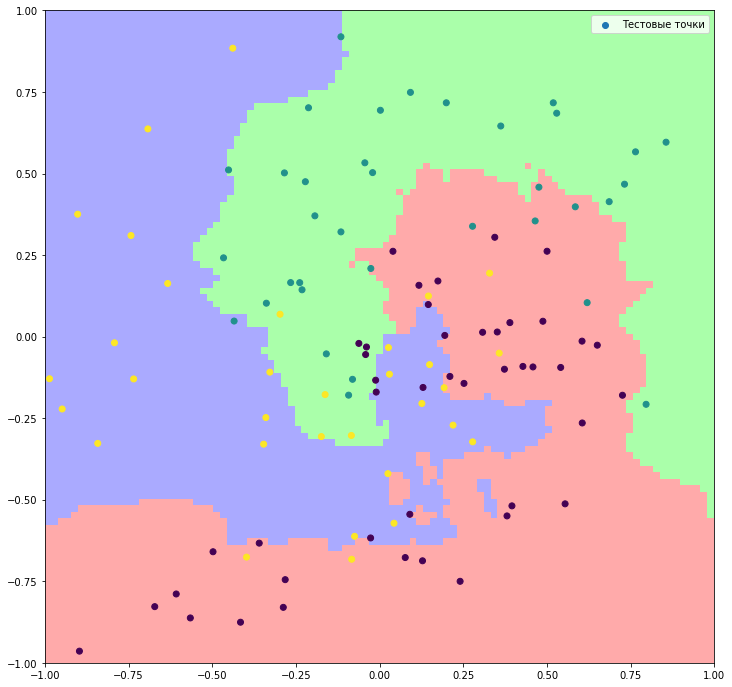

In [12]:
plt.figure(figsize=(12, 12))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Тестовые точки')

plt.legend()

plt.show()

### Рассмотрим вырожденный случай: метод одного ближайшего соседа
Проделаем для него все вычисления

Процент правильно угаданных ответов на обучающем множестве: 1.0
Процент правильно угаданных ответов на тестовом множестве: 0.7416666666666667


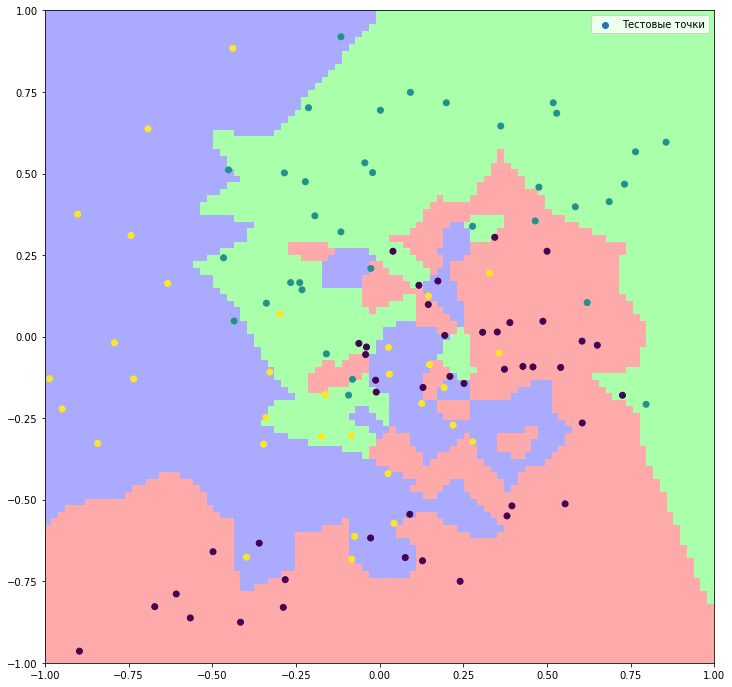

In [13]:
model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Процент правильно угаданных ответов на обучающем множестве: {accuracy_score(y_train, y_train_pred)}')
print(f'Процент правильно угаданных ответов на тестовом множестве: {accuracy_score(y_test, y_test_pred)}')

plt.figure(figsize=(12, 12))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Тестовые точки')

plt.legend()

plt.show()